In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Loading

In [17]:
df_screening = pd.read_csv("../output/result_df.csv") # screening & treatment
df_diagnosis = pd.read_csv("../output/result_df-5.csv")

df_province = pd.read_csv("../output/group_by_province.csv")
df_hf_type = pd.read_csv("../output/group_by_hf_type.csv")
df_hf_tb_type = pd.read_csv("../output/group_by_hf_tb_type.csv")
df_dig_cdt_only = pd.read_csv("../output/group_by_genexpert_or_microscopy.csv")

2. Visualization

Diagnosis

In [18]:
df_diagnosis['hf_count'].unique()

array([23, 24, 10, 21, 46, 40, 18, 41, 45,  5,  4,  2,  8, 42, 17,  1],
      dtype=int64)

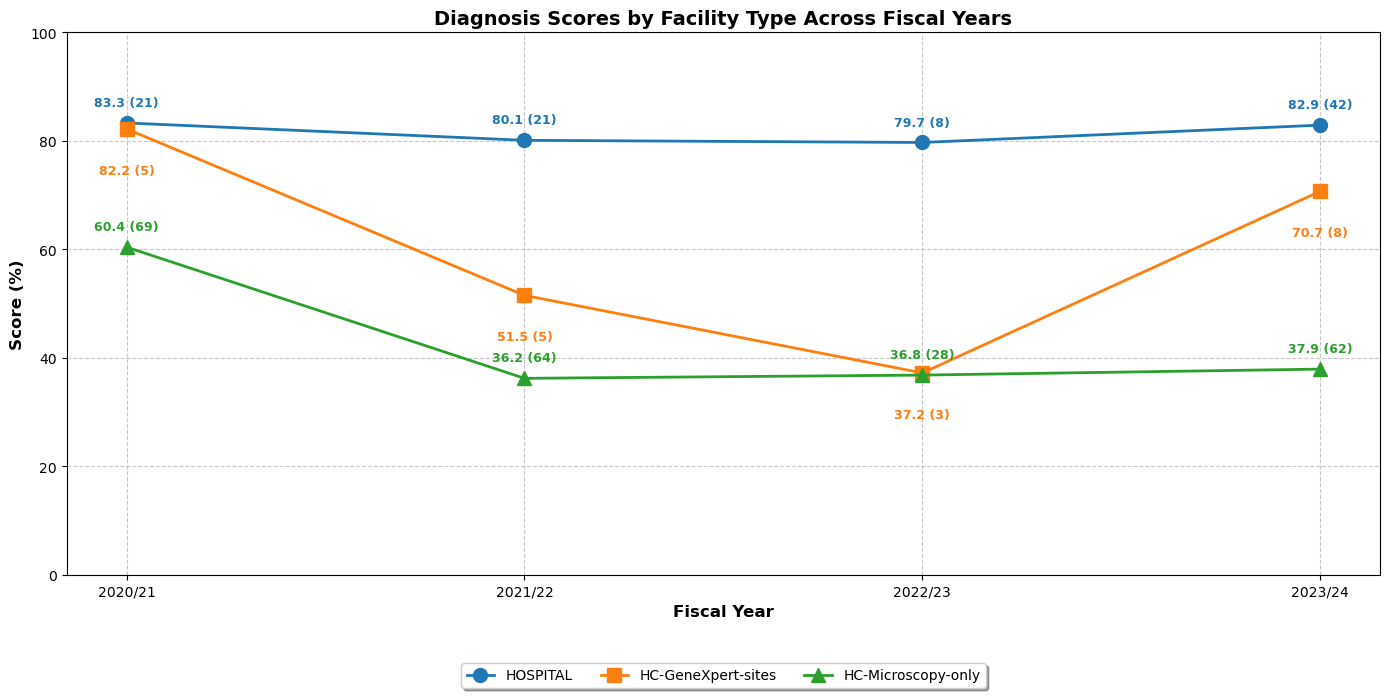

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the diagnosis section only
diagnosis_data = df_diagnosis[df_diagnosis['section'] == 'diagnosis']

# Create a pivot table to reshape the data into the format we need
pivot_data = diagnosis_data.pivot_table(
    index=['hf_type', 'genexpert_or_microscopy', 'hf_tb_type'],
    columns='fy',
    values=['overall_score', 'hf_count'],
    aggfunc={'overall_score': 'mean', 'hf_count': 'sum'}
)

# Create the categories that match your table
categories = []
counts = []

# Hospital data (all hospitals regardless of other factors)
hospital_data = diagnosis_data[diagnosis_data['hf_type'] == 'hospital (dh,ph,rh)'].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()
categories.append('HOSPITAL')

# Health Center data (all HCs)
# hc_data = diagnosis_data[diagnosis_data['hf_type'] == 'health center'].groupby('fy').agg(
#     overall_score=('overall_score', 'mean'),
#     hf_count=('hf_count', 'sum')
# ).reset_index()
# categories.append('HC (all)')

# HC-GeneXpert-sites
hc_gxp_data = diagnosis_data[(diagnosis_data['hf_type'] == 'health center') & 
                             (diagnosis_data['genexpert_or_microscopy'] == 'yes')].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()
categories.append('HC-GeneXpert-sites')

# HC-Microscopy-only
hc_micro_data = diagnosis_data[(diagnosis_data['hf_type'] == 'health center') & 
                               (diagnosis_data['genexpert_or_microscopy'] == 'no')].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()
categories.append('HC-Microscopy-only')

# Now create the plot
plt.figure(figsize=(14, 8))

# Define colors for each category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'd']

# Rename fiscal years for display
fy_display = {
    '2020-2021': '2020/21',
    '2021-2022': '2021/22',
    '2022-2023': '2022/23',
    '2023-2024': '2023/24'
}

# Plot each category
datasets = [hospital_data, hc_gxp_data, hc_micro_data]

for i, (category, data, color, marker) in enumerate(zip(categories, datasets, colors, markers)):
    # Extract years and convert to display format
    years = [fy_display[y] for y in data['fy']]
    
    # Extract scores and round to 1 decimal place
    scores = [round(score, 1) for score in data['overall_score']]
    
    # Extract facility counts
    counts = data['hf_count']
    
    # Plot the line
    plt.plot(years, scores, marker=marker, linestyle='-', linewidth=2, 
             color=color, label=category, markersize=10)
    
    # Add annotations for each point
    for j, (year, score, count) in enumerate(zip(years, scores, counts)):
        plt.annotate(f"{score} ({int(count)})", 
                     xy=(year, score), 
                     xytext=(0, 10 if i % 2 == 0 else -25),  # Offset text to avoid overlap
                     textcoords='offset points',
                     ha='center', 
                     va='bottom' if i % 2 == 0 else 'top',
                     fontsize=9,
                     fontweight='bold',
                     color=color)

# Add chart elements
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Diagnosis Scores by Facility Type Across Fiscal Years', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # Set y-axis to go from 0 to 100 percent

# Add a legend with a shadow effect
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          ncol=4, fancybox=True, shadow=True, fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for legend
plt.show()

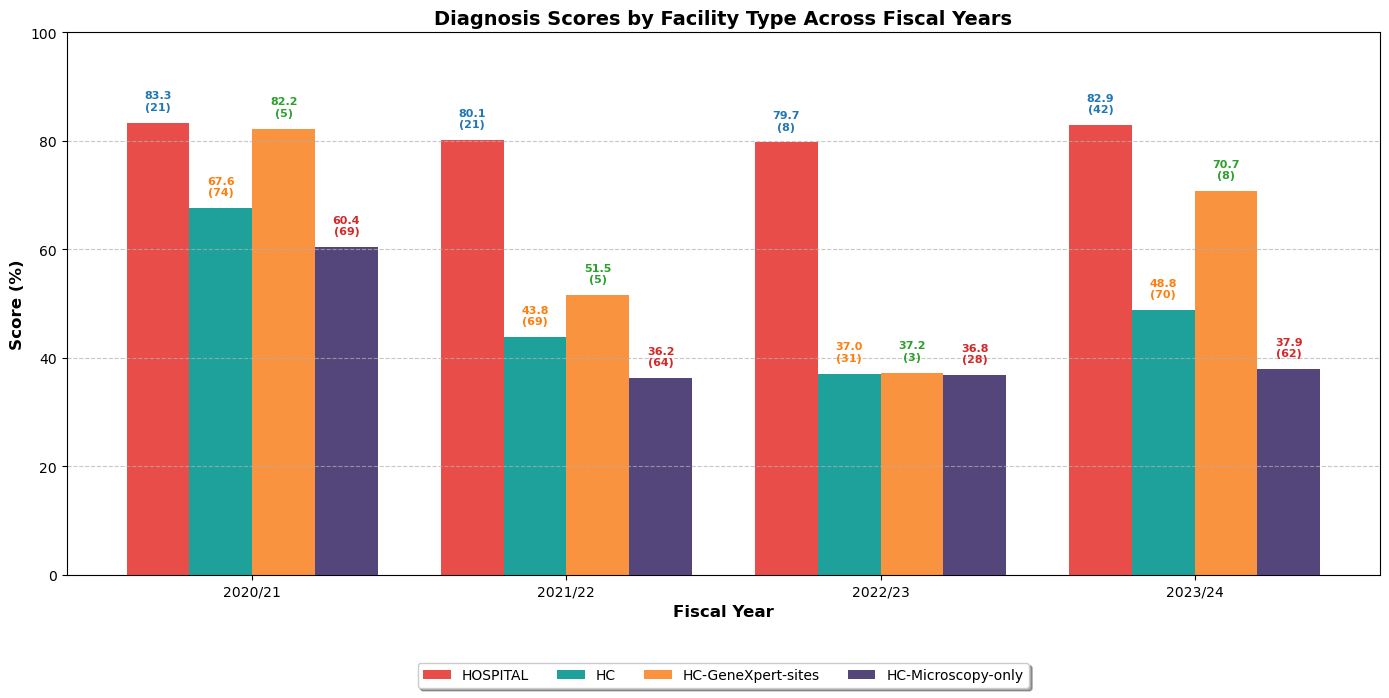

In [20]:
plt.figure(figsize=(14, 8))

# Set width of bars
bar_width = 0.2
index = np.arange(4)  # 4 fiscal years
fiscal_years = ['2020/21', '2021/22', '2022/23', '2023/24']

# Prepare data arrays
hospital_scores = [round(hospital_data[hospital_data['fy'] == f'20{i}-20{i+1}']['overall_score'].values[0], 1) 
                   if not hospital_data[hospital_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                   for i in range(20, 24)]
hc_scores = [round(hc_data[hc_data['fy'] == f'20{i}-20{i+1}']['overall_score'].values[0], 1) 
             if not hc_data[hc_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
             for i in range(20, 24)]
hc_gxp_scores = [round(hc_gxp_data[hc_gxp_data['fy'] == f'20{i}-20{i+1}']['overall_score'].values[0], 1) 
                 if not hc_gxp_data[hc_gxp_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                 for i in range(20, 24)]
hc_micro_scores = [round(hc_micro_data[hc_micro_data['fy'] == f'20{i}-20{i+1}']['overall_score'].values[0], 1) 
                   if not hc_micro_data[hc_micro_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                   for i in range(20, 24)]

hospital_counts = [hospital_data[hospital_data['fy'] == f'20{i}-20{i+1}']['hf_count'].values[0] 
                  if not hospital_data[hospital_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                  for i in range(20, 24)]
hc_counts = [hc_data[hc_data['fy'] == f'20{i}-20{i+1}']['hf_count'].values[0] 
            if not hc_data[hc_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
            for i in range(20, 24)]
hc_gxp_counts = [hc_gxp_data[hc_gxp_data['fy'] == f'20{i}-20{i+1}']['hf_count'].values[0] 
                if not hc_gxp_data[hc_gxp_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                for i in range(20, 24)]
hc_micro_counts = [hc_micro_data[hc_micro_data['fy'] == f'20{i}-20{i+1}']['hf_count'].values[0] 
                  if not hc_micro_data[hc_micro_data['fy'] == f'20{i}-20{i+1}'].empty else 0 
                  for i in range(20, 24)]

# Create the bars
plt.bar(index, hospital_scores, bar_width, label='HOSPITAL', color='#E94D4A')
plt.bar(index + bar_width, hc_scores, bar_width, label='HC', color='#1EA19B')
plt.bar(index + 2*bar_width, hc_gxp_scores, bar_width, label='HC-GeneXpert-sites', color='#FA933F')
plt.bar(index + 3*bar_width, hc_micro_scores, bar_width, label='HC-Microscopy-only', color='#54467B')

# Add value and count labels
for i in range(4):
    plt.text(i, hospital_scores[i] + 2, f"{hospital_scores[i]}\n({int(hospital_counts[i])})", 
             ha='center', va='bottom', color='#1f77b4', fontweight='bold', fontsize=8)
    plt.text(i + bar_width, hc_scores[i] + 2, f"{hc_scores[i]}\n({int(hc_counts[i])})", 
             ha='center', va='bottom', color='#ff7f0e', fontweight='bold', fontsize=8)
    plt.text(i + 2*bar_width, hc_gxp_scores[i] + 2, f"{hc_gxp_scores[i]}\n({int(hc_gxp_counts[i])})", 
             ha='center', va='bottom', color='#2ca02c', fontweight='bold', fontsize=8)
    plt.text(i + 3*bar_width, hc_micro_scores[i] + 2, f"{hc_micro_scores[i]}\n({int(hc_micro_counts[i])})", 
             ha='center', va='bottom', color='#d62728', fontweight='bold', fontsize=8)

# Add labels, title and legend
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Diagnosis Scores by Facility Type Across Fiscal Years', fontsize=14, fontweight='bold')
plt.xticks(index + 1.5*bar_width, fiscal_years)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          ncol=4, fancybox=True, shadow=True, fontsize=10)

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

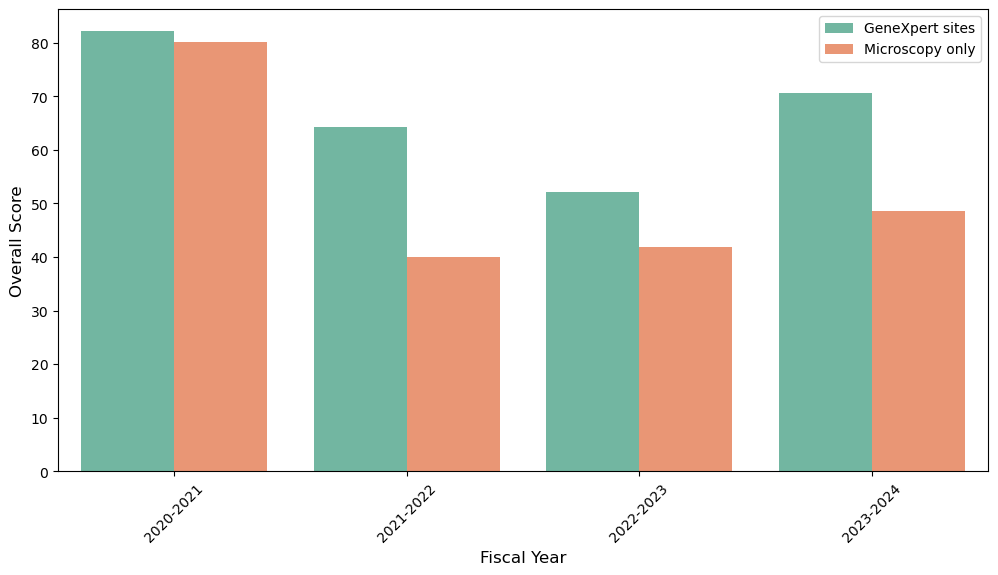

In [21]:
df_filtered = df_diagnosis[
    (df_diagnosis["hf_tb_type"] == "CDT") & 
    (df_diagnosis["section"] == "diagnosis") & 
    (df_diagnosis["hf_type"] == "health center")
]

# Step 2: Aggregate overall scores
# df_total = df_filtered.groupby("fy")["overall_score"].mean().reset_index()
df_cdt = df_filtered[df_filtered["genexpert_or_microscopy"] == "yes"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["genexpert_or_microscopy"] == "no"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
# df_total["category"] = "Total HC"
df_cdt["category"] = "GeneXpert sites"
df_ct["category"] = "Microscopy only"

# Step 4: Combine data
# df_plot = pd.concat([df_total, df_cdt, df_ct])
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="fy", y="overall_score", hue="category", palette="Set2")

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
# plt.title("Distribution of GeneXpert sites Scores in Diagnosis Across Fiscal Years", fontsize=14)
plt.legend(title="")
plt.xticks(rotation=45)

# Show plot
plt.show()

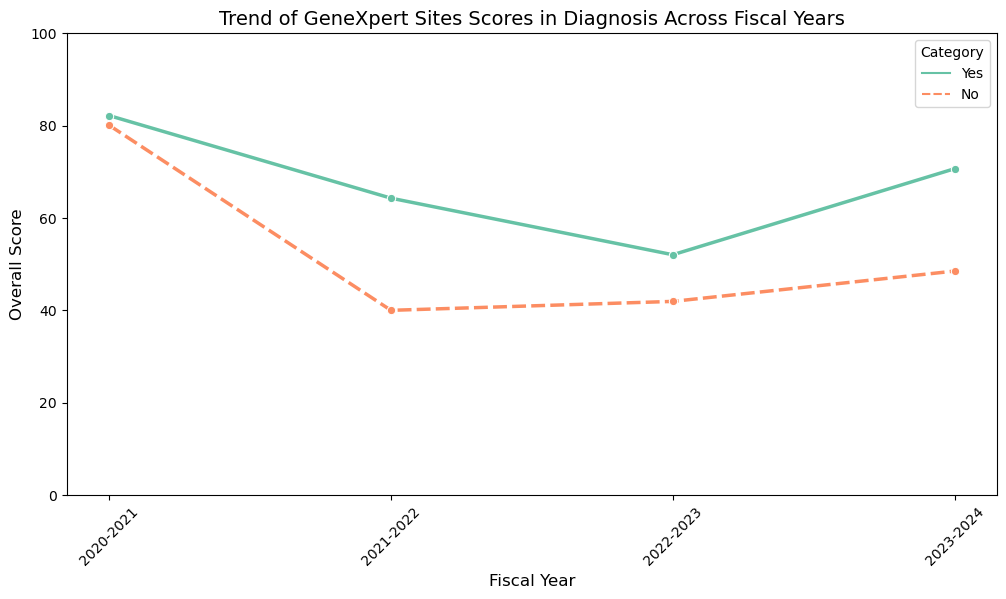

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter for CDT health centers in diagnosis section
df_filtered = df_diagnosis[
    (df_diagnosis["hf_tb_type"] == "CDT") & 
    (df_diagnosis["section"] == "diagnosis") & 
    (df_diagnosis["hf_type"] == "health center")
]

# Step 2: Aggregate overall scores based on GeneXpert/Microscopy usage
df_cdt = df_filtered[df_filtered["genexpert_or_microscopy"] == "yes"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["genexpert_or_microscopy"] == "no"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
df_cdt["category"] = "Yes"
df_ct["category"] = "No"

# Step 4: Combine data
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="fy", y="overall_score", hue="category", style="category", marker="o", linewidth=2.5, palette="Set2")

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
plt.title("Trend of GeneXpert Sites Scores in Diagnosis Across Fiscal Years", fontsize=14)
plt.legend(title="Category")
plt.xticks(rotation=45)

# Show plot
plt.show()


Screening

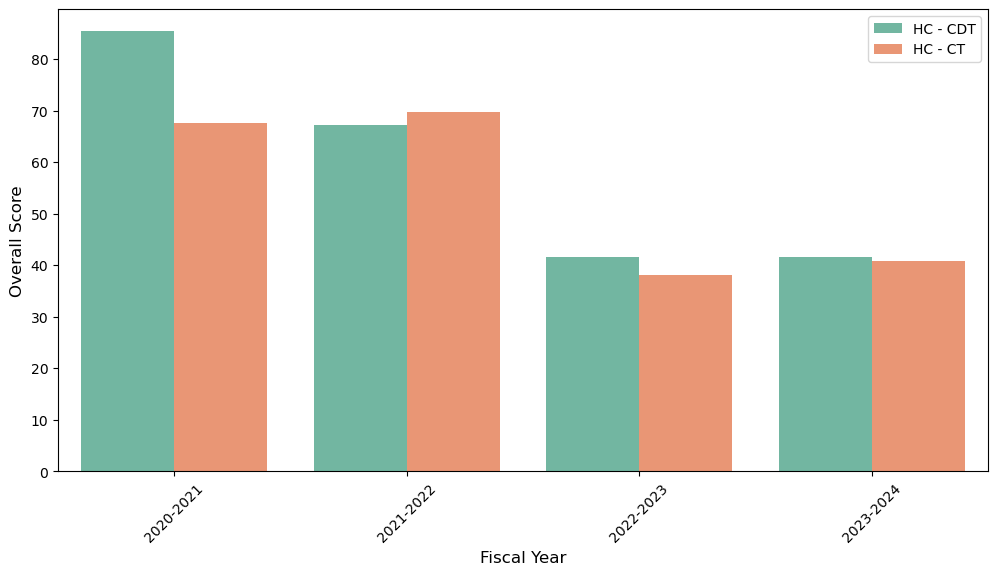

In [23]:
df_filtered = df_screening[(df_screening["section"] == "screening") & (df_screening["hf_type"] == "Health Center")]

# Step 2: Aggregate overall scores
# df_total = df_filtered.groupby("fy")["overall_score"].mean().reset_index()
df_cdt = df_filtered[df_filtered["hf_tb_type"] == "CDT"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["hf_tb_type"] == "CT"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
# df_total["category"] = "Total HC"
df_cdt["category"] = "HC - CDT"
df_ct["category"] = "HC - CT"

# Step 4: Combine data
# df_plot = pd.concat([df_total, df_cdt, df_ct])
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="fy", y="overall_score", hue="category", palette="Set2")

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
# plt.title("Distribution of Health Center (HC) Scores in Screening Across Fiscal Years", fontsize=14)
plt.legend(title="")
plt.xticks(rotation=45)

# Show plot
plt.show()

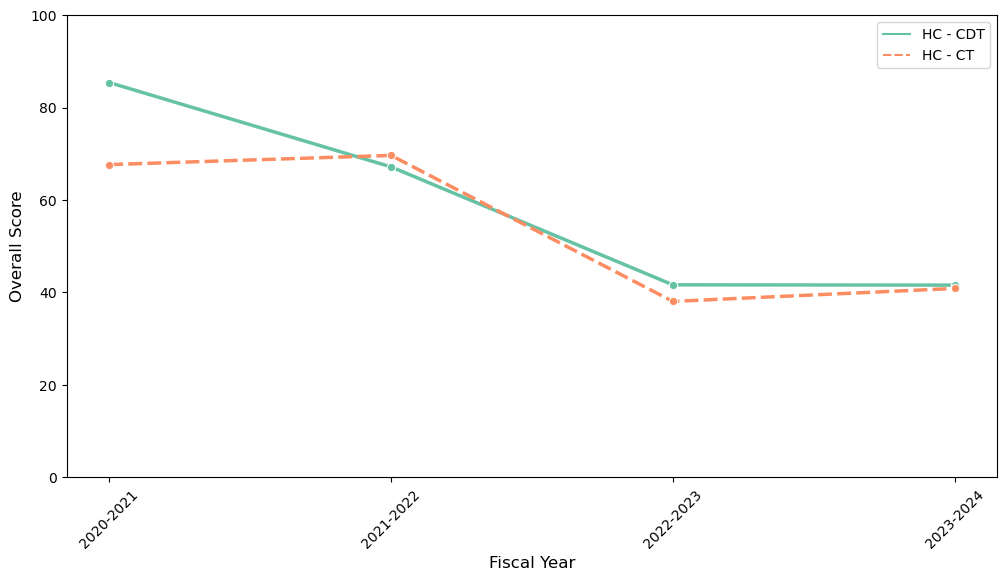

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter Health Centers (HC) in screening section
df_filtered = df_screening[(df_screening["section"] == "screening") & (df_screening["hf_type"] == "Health Center")]

# Step 2: Aggregate overall scores for CDT and CT
df_cdt = df_filtered[df_filtered["hf_tb_type"] == "CDT"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["hf_tb_type"] == "CT"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
df_cdt["category"] = "HC - CDT"
df_ct["category"] = "HC - CT"

# Step 4: Combine data
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="fy", y="overall_score", hue="category", style="category", marker="o", linewidth=2.5, palette="Set2")

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
# plt.title("Trend of Health Center (HC) Scores in Screening Across Fiscal Years", fontsize=14)
plt.legend(title="")
plt.xticks(rotation=45)

# Show plot
plt.show()


treatment

In [25]:
df_screening.columns

Index(['summary_group', 'hf_tb_type', 'section', 'hf_type', 'fy',
       'overall_score', 'hf_count'],
      dtype='object')

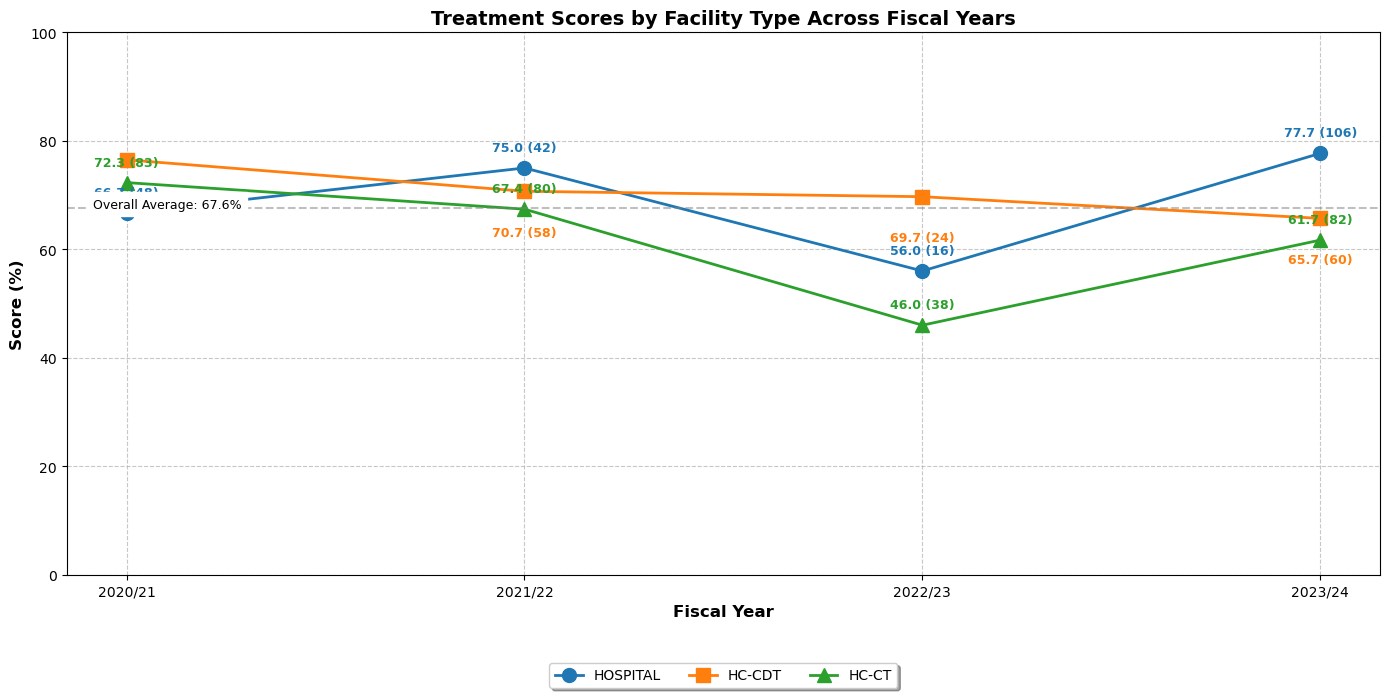

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's process the data to match your table structure
# Filter for treatment section
treatment_data = df_screening[df_screening['section'] == 'treatment']

# Create the categories that match your table
# Hospital data
hospital_data = treatment_data[treatment_data['hf_type'] == 'Hospital (DH,PH,RH)'].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()

# All Health Centers
# hc_data = treatment_data[treatment_data['hf_type'] == 'Health Center'].groupby('fy').agg(
#     overall_score=('overall_score', 'mean'),
#     hf_count=('hf_count', 'sum')
# ).reset_index()

# HC-CDT (Health Centers with TB Diagnosis capability)
hc_cdt_data = treatment_data[(treatment_data['hf_type'] == 'Health Center') & 
                              (treatment_data['hf_tb_type'] == 'CDT')].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()

# HC-CT (Health Centers with TB Treatment only)
hc_ct_data = treatment_data[(treatment_data['hf_type'] == 'Health Center') & 
                             (treatment_data['hf_tb_type'] == 'CT')].groupby('fy').agg(
    overall_score=('overall_score', 'mean'),
    hf_count=('hf_count', 'sum')
).reset_index()

# Create the plot
plt.figure(figsize=(14, 8))

# Define colors for each category
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'd']
categories = ['HOSPITAL', 'HC-CDT', 'HC-CT']

# Rename fiscal years for display
fy_display = {
    '2020-2021': '2020/21',
    '2021-2022': '2021/22',
    '2022-2023': '2022/23',
    '2023-2024': '2023/24'
}

# Ensure all fiscal years are present in all datasets (fill with NaN if missing)
all_fys = sorted(treatment_data['fy'].unique())
datasets = [hospital_data, hc_cdt_data, hc_ct_data]
for data in datasets:
    for fy in all_fys:
        if fy not in data['fy'].values:
            data = pd.concat([data, pd.DataFrame({'fy': [fy], 'overall_score': [np.nan], 'hf_count': [0]})], ignore_index=True)
    data.sort_values('fy', inplace=True)

# Plot each dataset
for i, (category, data, color, marker) in enumerate(zip(categories, datasets, colors, markers)):
    # Extract years and values
    years = [fy_display[fy] for fy in data['fy']]
    scores = [round(score, 1) if not np.isnan(score) else 0 for score in data['overall_score']]
    counts = data['hf_count']
    
    # Plot the line
    plt.plot(years, scores, marker=marker, linestyle='-', linewidth=2, 
             color=color, label=category, markersize=10)
    
    # Add annotations
    for j, (year, score, count) in enumerate(zip(years, scores, counts)):
        if score > 0:  # Only annotate non-zero values
            plt.annotate(f"{score} ({int(count)})", 
                        xy=(j, score), 
                        xytext=(0, 10 if i % 2 == 0 else -25),  # Offset to avoid overlap
                        textcoords='offset points',
                        ha='center', 
                        va='bottom' if i % 2 == 0 else 'top',
                        fontsize=9,
                        fontweight='bold',
                        color=color)

# Add chart elements
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Treatment Scores by Facility Type Across Fiscal Years', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)  # Set y-axis to go from 0 to 100 percent

# Add a legend
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          ncol=4, fancybox=True, shadow=True, fontsize=10)

# Add a horizontal line for the overall average if needed
overall_avg = treatment_data['overall_score'].mean()
plt.axhline(y=overall_avg, color='gray', linestyle='--', alpha=0.5)
plt.annotate(f'Overall Average: {overall_avg:.1f}%', 
             xy=(0.02, overall_avg), 
             xycoords=('axes fraction', 'data'),
             fontsize=9, 
             backgroundcolor='white')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for legend
plt.show()

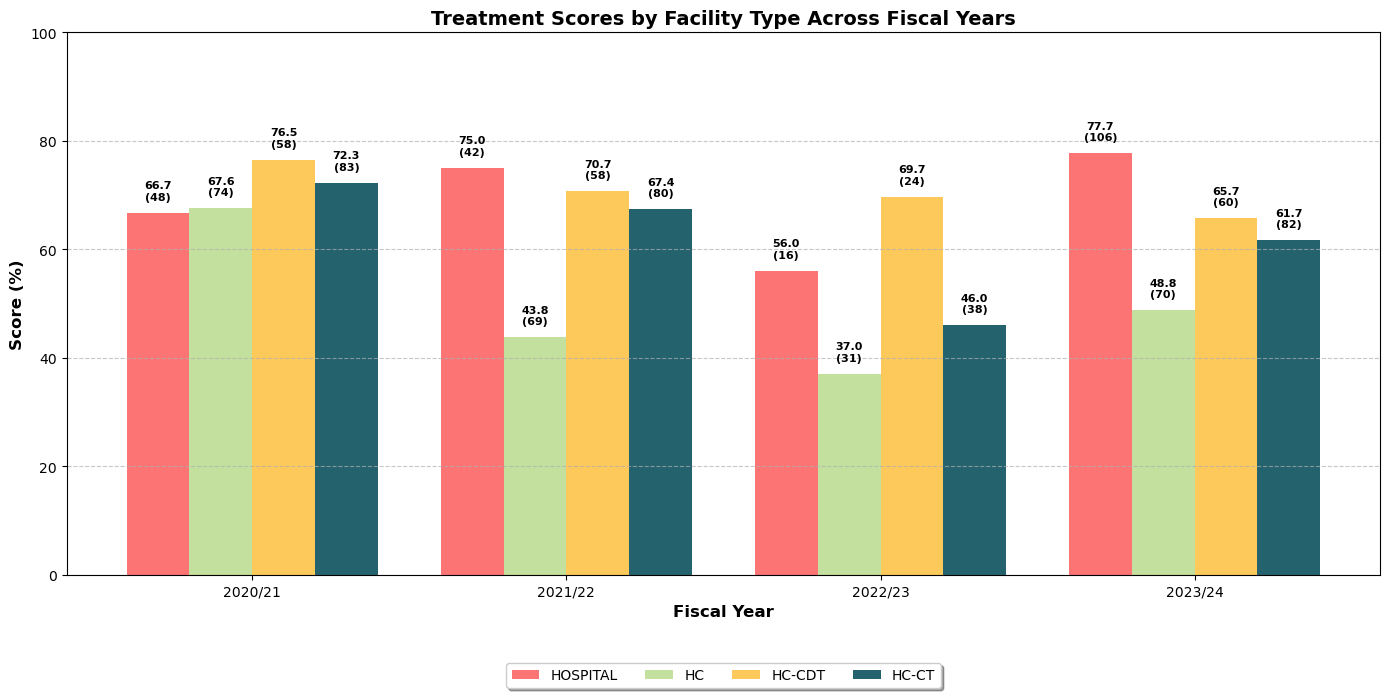

In [27]:
plt.figure(figsize=(14, 8))

# Set width of bars
bar_width = 0.2
years_list = sorted(treatment_data['fy'].unique())
n_years = len(years_list)
index = np.arange(n_years)
years_display = [fy_display[fy] for fy in years_list]

# Ensure data arrays are correctly aligned with fiscal years
def get_aligned_data(dataset, column):
    result = []
    for fy in years_list:
        values = dataset[dataset['fy'] == fy][column]
        if len(values) > 0:
            if column == 'overall_score':
                result.append(round(values.iloc[0], 1))
            else:
                result.append(int(values.iloc[0]))
        else:
            result.append(0)
    return result

# Prepare data arrays
hospital_scores = get_aligned_data(hospital_data, 'overall_score')
hc_scores = get_aligned_data(hc_data, 'overall_score')
hc_cdt_scores = get_aligned_data(hc_cdt_data, 'overall_score')
hc_ct_scores = get_aligned_data(hc_ct_data, 'overall_score')

hospital_counts = get_aligned_data(hospital_data, 'hf_count')
hc_counts = get_aligned_data(hc_data, 'hf_count')
hc_cdt_counts = get_aligned_data(hc_cdt_data, 'hf_count')
hc_ct_counts = get_aligned_data(hc_ct_data, 'hf_count')

# Create the bars
bar1 = plt.bar(index, hospital_scores, bar_width, label='HOSPITAL', color='#FC7474')
bar2 = plt.bar(index + bar_width, hc_scores, bar_width, label='HC', color='#C3E09E')
bar3 = plt.bar(index + 2*bar_width, hc_cdt_scores, bar_width, label='HC-CDT', color='#FDC95B')
bar4 = plt.bar(index + 3*bar_width, hc_ct_scores, bar_width, label='HC-CT', color='#24626D')

# Add value and count labels
def add_labels(bars, scores, counts):
    for bar, score, count in zip(bars, scores, counts):
        if score > 0:  # Only label non-zero values
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{score}\n({count})',
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

add_labels(bar1, hospital_scores, hospital_counts)
add_labels(bar2, hc_scores, hc_counts)
add_labels(bar3, hc_cdt_scores, hc_cdt_counts)
add_labels(bar4, hc_ct_scores, hc_ct_counts)

# Add labels, title and legend
plt.xlabel('Fiscal Year', fontsize=12, fontweight='bold')
plt.ylabel('Score (%)', fontsize=12, fontweight='bold')
plt.title('Treatment Scores by Facility Type Across Fiscal Years', fontsize=14, fontweight='bold')
plt.xticks(index + 1.5*bar_width, years_display)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          ncol=4, fancybox=True, shadow=True, fontsize=10)

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

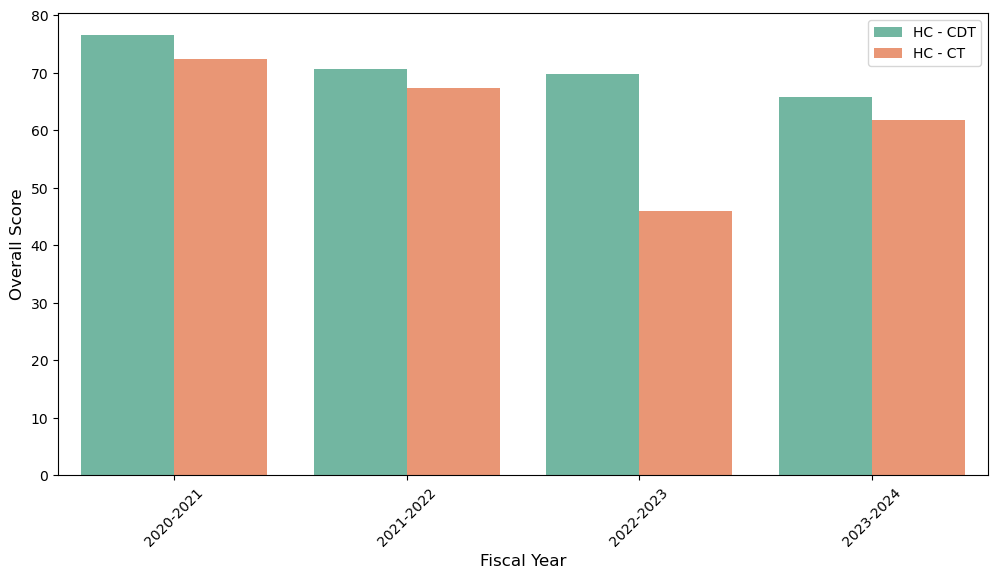

In [28]:
df_filtered = df_screening[(df_screening["section"] == "treatment") & (df_screening["hf_type"] == "Health Center")]

# Step 2: Aggregate overall scores
# df_total = df_filtered.groupby("fy")["overall_score"].mean().reset_index()
df_cdt = df_filtered[df_filtered["hf_tb_type"] == "CDT"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["hf_tb_type"] == "CT"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
# df_total["category"] = "Total HC"
df_cdt["category"] = "HC - CDT"
df_ct["category"] = "HC - CT"

# Step 4: Combine data
# df_plot = pd.concat([df_total, df_cdt, df_ct])
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="fy", y="overall_score", hue="category", palette="Set2")

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
# plt.title("Distribution of Health Center (HC) Scores in Treatment Across Fiscal Years", fontsize=14)
plt.legend(title="")
plt.xticks(rotation=45)

# Show plot
plt.show()

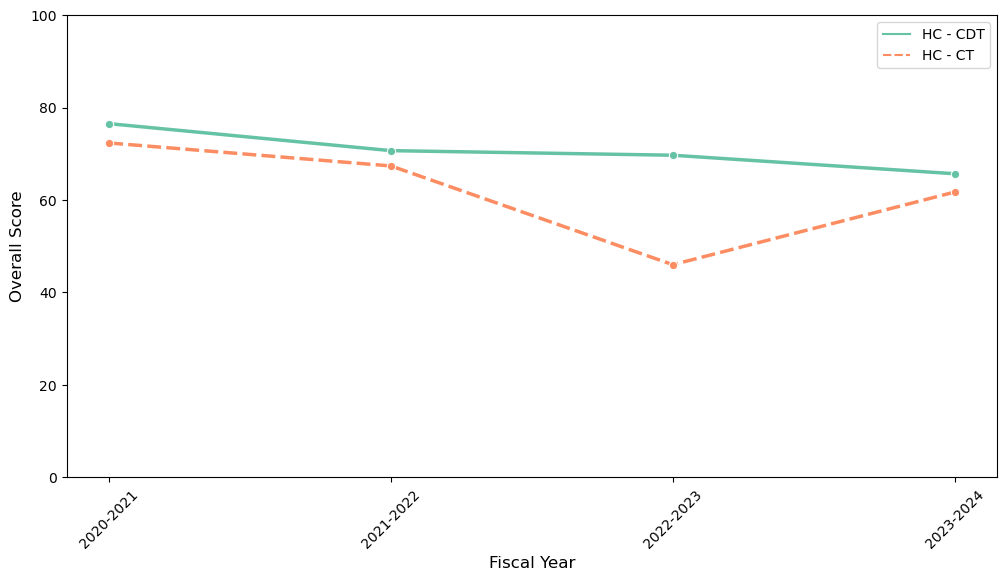

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Filter Health Centers (HC) in screening section
df_filtered = df_screening[(df_screening["section"] == "treatment") & (df_screening["hf_type"] == "Health Center")]

# Step 2: Aggregate overall scores for CDT and CT
df_cdt = df_filtered[df_filtered["hf_tb_type"] == "CDT"].groupby("fy")["overall_score"].mean().reset_index()
df_ct = df_filtered[df_filtered["hf_tb_type"] == "CT"].groupby("fy")["overall_score"].mean().reset_index()

# Step 3: Rename columns for merging
df_cdt["category"] = "HC - CDT"
df_ct["category"] = "HC - CT"

# Step 4: Combine data
df_plot = pd.concat([df_cdt, df_ct])

# Step 5: Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="fy", y="overall_score", hue="category", style="category", marker="o", linewidth=2.5, palette="Set2")

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Customize labels and title
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Overall Score", fontsize=12)
# plt.title("Trend of Health Center (HC) Scores in Treatment Across Fiscal Years", fontsize=14)
plt.legend(title="")
plt.xticks(rotation=45)

# Show plot
plt.show()


province

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


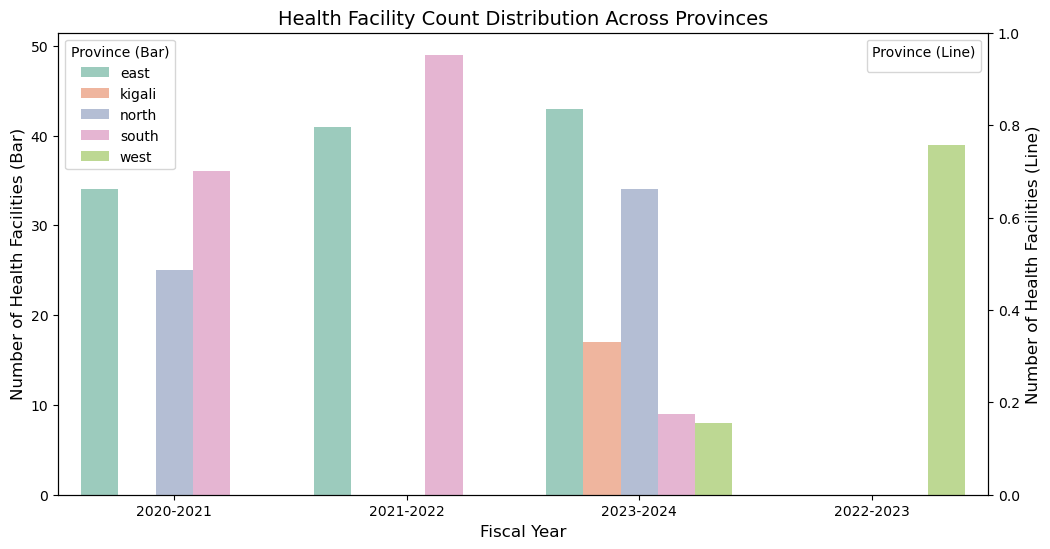

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (Assuming you already have your data)
# df_province = pd.read_csv("your_data.csv")  # Uncomment if loading from CSV

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for hf_count
sns.barplot(data=df_province, x="fy", y="hf_count", hue="province", ax=ax1, palette="Set2", alpha=0.7)

# Create secondary axis for line plot
ax2 = ax1.twinx()

# Line plot for hf_count trends
# sns.lineplot(data=df_province, x="fy", y="hf_count", hue="province", marker="o", ax=ax2, palette="dark")

# Labels & Titles
ax1.set_xlabel("Fiscal Year", fontsize=12)
ax1.set_ylabel("Number of Health Facilities (Bar)", fontsize=12)
ax2.set_ylabel("Number of Health Facilities (Line)", fontsize=12)
ax1.set_title("Health Facility Count Distribution Across Provinces", fontsize=14)

# Adjust legends
ax1.legend(title="Province (Bar)", loc="upper left")
ax2.legend(title="Province (Line)", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


Health facility type

Health facility TB type

Diagnostic method